In [6]:
from spectrogram_dataset import AudioFeature, create_audio_feature_dataset,create_dataframes
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from svm_prediction import svm_prediction

from dataset_queries import *

In [7]:
file_path_df, track_df, genre_df, total_genre_df = create_dataframes(file_paths_path = 'data/all_data_paths.txt' , 
                                                     tracks_csv_path = 'data/fma_metadata/tracks.csv', 
                                                     genre_csv_path = 'data/fma_metadata/genres.csv')


In [19]:
total_genre_df.iloc[20:30]

,genre_id,title
20,21,Hip-Hop
21,22,Audio Collage
22,25,Punk
23,26,Post-Rock
24,27,Lo-Fi
25,30,Field Recordings
26,31,Metal
27,32,Noise
28,33,Psych-Folk
29,36,Krautrock


In [10]:
track_df[track_df['track_id'] == 108925]

,track_id,album_id,album_listens,album_title,artist_name,track_favorites,track_genre_top,track_genres,track_interest,track_listens,track_title
71712,108925,16911,8316,Live on Redundancy Radio with DJ Disk Jockey: ...,Awkward Girls,0,Rock,"[25, 85]",6882,6592,Epic Adventure


In [9]:
train_data, validation_data, test_data = create_audio_feature_dataset(file_path_df, track_df, genre_df, test_percentage = .10, validation_percentage = .10)



Starting making train_data
Failed to load  data/fma_small/108/108925.mp3
Failed to load  data/fma_small/099/099134.mp3


KeyboardInterrupt: 

In [3]:
# np.save('train_data', train_data)
# np.save('validation_data', validation_data)
# np.save('test_data', test_data)

train_data = np.load('train_data.npy', allow_pickle = True)
test_data = np.load('test_data.npy', allow_pickle = True)
validation_data = np.load('validation_data.npy', allow_pickle = True)

In [4]:
# train_data_array =np.array([np.concatenate([np.average(row[0], axis = 1), np.median(row[0], axis = 1), 
#                                             np.std(row[0], axis = 1), [np.average(row[1])], [np.average(row[2])], 
#                                             np.average(row[3], axis = 1), [np.average(row[4])], 
#                                             [np.average(5)]]) for row in train_data])


train_data_array =np.array([np.concatenate([np.average(row[0], axis = 1), np.median(row[0], axis = 1), 
                                            np.std(row[0], axis = 1), [np.average(row[3])], [np.median(row[3])], 
                                            [np.std(row[3])]]) for row in train_data])

train_data_label = [row[6] for row in train_data]



# train_data_array =np.array([np.concatenate([np.average(row[0].numpy(), axis = 1), 
#                               np.median(row[0].numpy(), axis = 1), 
#                               np.std(row[0].numpy(), axis = 1)]) for row in train_data])
# train_data_label = [torch.argmax(row[1]).item() for row in train_data]



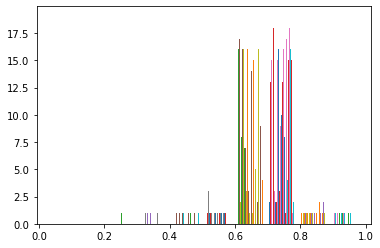

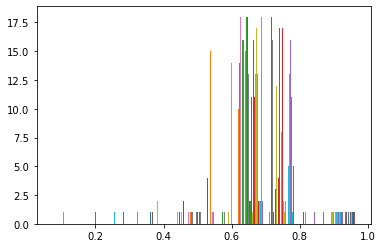

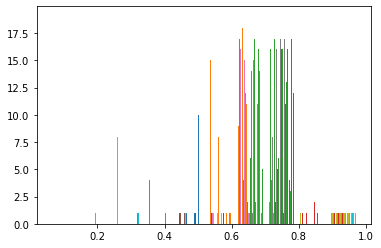

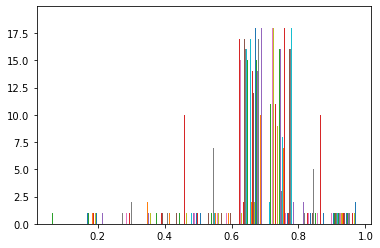

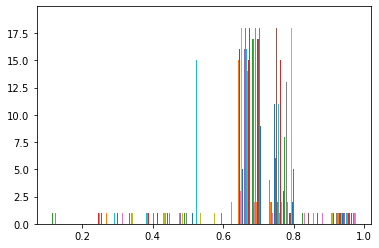

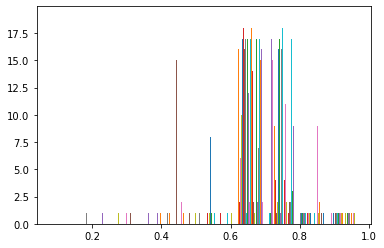

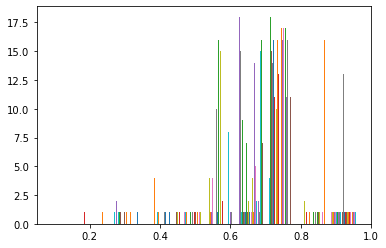

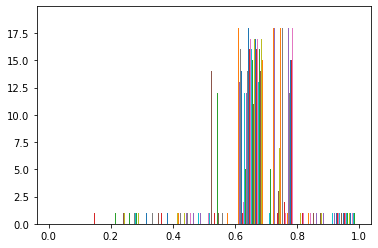

In [5]:
# unique_classes = np.unique(train_data_label)
# list_of_features = [[] for i in range(len(unique_classes))]
# for index, row in enumerate(train_data):
#     genre = train_data_label[index]
#     genre_loc = np.where(unique_classes == genre)[0][0]
    
    
#     list_of_features[genre_loc].append(np.average(row[0], axis = 1))
    
# for feature in list_of_features:
#     plt.figure()
#     plt.hist(feature)

In [6]:
# test_data_array =np.array([np.concatenate([np.average(row[0], axis = 1), np.median(row[0], axis = 1), 
#                                             np.std(row[0], axis = 1), [np.average(row[1])], [np.average(row[2])], 
#                                             np.average(row[3], axis = 1), [np.average(row[4])], 
#                                             [np.average(5)]]) for row in test_data])


test_data_array =np.array([np.concatenate([np.average(row[0], axis = 1), np.median(row[0], axis = 1), 
                                            np.std(row[0], axis = 1), [np.average(row[3])], [np.median(row[3])], 
                                            [np.std(row[3])]]) for row in test_data])

test_data_label = [row[6] for row in test_data]

# test_data_array = np.array([np.concatenate([np.average(row[0].numpy(), axis = 1), 
#                               np.median(row[0].numpy(), axis = 1), 
#                               np.std(row[0].numpy(), axis = 1)]) for row in test_data])
# test_data_label = [torch.argmax(row[1]).item() for row in test_data]

# n = np.min(test_data_array.shape[0], teset_data_label.shape[0])

In [7]:
import pickle
with open('svm_model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [8]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 500)
# train_array_pca = pca.fit_transform(train_data_array)

In [9]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(train_data_array, train_data_label)

SVC(kernel='linear')

In [10]:
# test_array_pca = pca.fit_transform(test_data_array)
labels = clf.predict(test_data_array)


In [11]:
# labels 

In [12]:
ind = np.where(labels ==  test_data_label)[0]
print(len(ind), len(labels), len(ind)/len(labels))

307 800 0.38375


In [13]:
for i in np.unique(test_data_label):
    true_ind = np.where(test_data_label == i)[0]
    pred_ind = np.where(labels == i)[0]
    percentage_ind = (len(np.intersect1d(true_ind,pred_ind))/len(true_ind))*100
    
    FP = len(np.setdiff1d(pred_ind,true_ind))
    TP = len(np.intersect1d(true_ind,pred_ind))

    print(' TP: ', TP, ' FP: ', FP, ' percent correct for genre', i, ': ', percentage_ind)
    
    

 TP:  52  FP:  96  percent correct for genre 0 :  60.46511627906976
 TP:  17  FP:  55  percent correct for genre 1 :  16.346153846153847
 TP:  57  FP:  88  percent correct for genre 2 :  64.04494382022472
 TP:  24  FP:  59  percent correct for genre 3 :  23.762376237623762
 TP:  55  FP:  67  percent correct for genre 4 :  46.21848739495798
 TP:  24  FP:  24  percent correct for genre 6 :  24.742268041237114
 TP:  27  FP:  34  percent correct for genre 8 :  27.0
 TP:  51  FP:  70  percent correct for genre 14 :  49.03846153846153


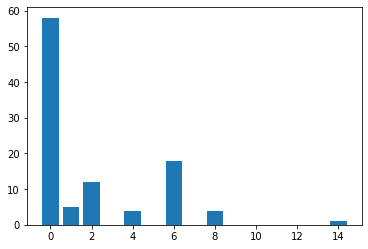

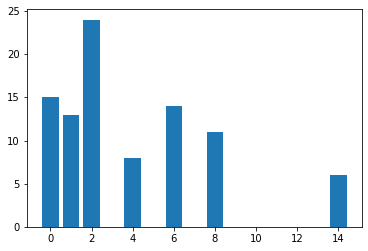

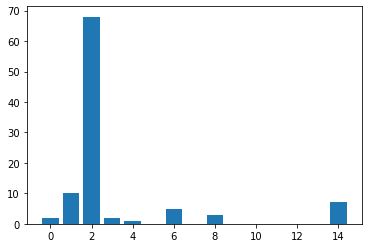

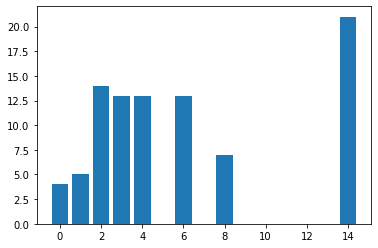

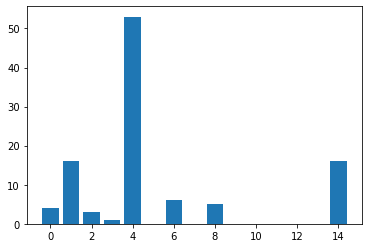

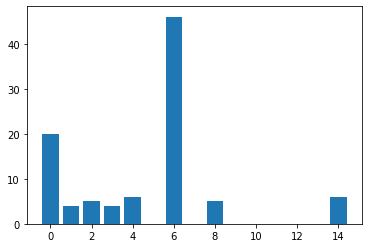

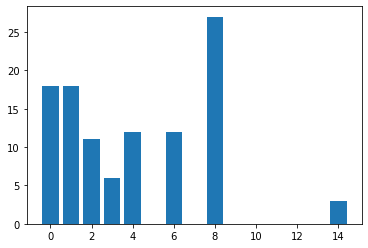

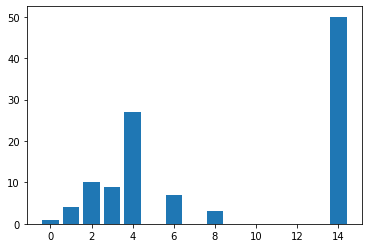

In [26]:
import matplotlib.pyplot as plt

for i in np.unique(test_data_label):
    true_ind = np.where(test_data_label == i)[0]
    pred_genres = labels[true_ind]
    unique, counts = np.unique(pred_genres, return_counts=True)
   
    plt.figure()
    plt.bar(unique, counts)



In [101]:
genre_df.head(20)

,index,genre_id,title
0,20,21,Hip-Hop
1,9,10,Pop
2,11,12,Rock
3,31,38,Experimental
4,16,17,Folk
5,3,4,Jazz
6,14,15,Electronic
7,19,20,Spoken
8,1,2,International
9,13,14,Soul-RnB


In [89]:
criterion = torch.nn.CrossEntropyLoss()
test_loader = torch.utils.data.DataLoader(validation_data, batch_size = 1, shuffle = False)
loss, acc = evaluate(model, test_loader, criterion)
print(loss, acc)

2.6234893356760343 0.24722221493721008


In [151]:
# torch.save(model.state_dict(), 'mfcc_model_2')
fin_model = NN()
fin_model.load_state_dict(torch.load('mfcc_model'))
# # model.eval()

<All keys matched successfully>

In [ ]:
#mfcc model had 2 conv with 1 in 1 out kernel size 3 and 1 linear
#mfcc model 2 2 conv 115 112 2 linear 32, 16

In [96]:
row = file_path_df['file_path']

In [158]:
import librosa
i = 10

filename = 'data/fma_small/' + row[i]

try:
    y, sr = librosa.load(filename, sr=None, mono=True)
except (RuntimeError, audioread.NoBackendError):
    print('Failed to load ', filename)

song_id = row[i].rsplit('/')[1].rsplit('.')[0].lstrip('0')

    
mel = librosa.feature.mfcc(y=y)
m = torch.nn.AdaptiveAvgPool1d(2500)
mel = m(torch.from_numpy(mel))
mel = (mel - torch.min(mel)) / (torch.max(mel) - torch.min(mel))

genre_text = track_df[track_df['track_id'] == int(song_id)]['track_genre_top']

print('true:', genre_text)

true: 68    Folk
Name: track_genre_top, dtype: object


In [159]:
output = fin_model(mel[None, :,:])
pred_genre = torch.argmax(output, dim = 1).item()
print('predicted:', genre_df.iloc[0]['title'])

predicted: Hip-Hop


In [160]:
for i in range(100):
    filename = 'data/fma_small/' + row[i]

    try:
        y, sr = librosa.load(filename, sr=None, mono=True)
    except (RuntimeError, audioread.NoBackendError):
        print('Failed to load ', filename)

    song_id = row[i].rsplit('/')[1].rsplit('.')[0].lstrip('0')


    mel = librosa.feature.mfcc(y=y)
    m = torch.nn.AdaptiveAvgPool1d(2500)
    mel = m(torch.from_numpy(mel))
    mel = (mel - torch.min(mel)) / (torch.max(mel) - torch.min(mel))

    genre_text = track_df[track_df['track_id'] == int(song_id)]['track_genre_top']

#     print('true:', genre_text)
    output = fin_model(mel[None, :,:])
    pred_genre = torch.argmax(output, dim = 1).item()
    print('predicted:', genre_df.iloc[0]['title'])

predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: Hip-Hop
predicted: H